<h1> Tiền xử lí dữ liệu & Phân tích khai phá dữ liệu 
    (Data Pre-Processing and EDA)

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 20)
pd.options.display.max_rows = 50
print("Setup complete.")

Setup complete.


<h2> Nhập dữ liệu (Import the dataset)

In [2]:
csv_file = "https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/tele_x/TeleX-Customer-Churn.csv"
data = pd.read_csv(csv_file)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Chúng tôi đánh giá trường 'customerID' không chứa nhiều giá trị có ích đối với phân tích. Vì vậy chúng tôi loại bỏ trường này ra khỏi bộ dữ liệu.

In [3]:
#Bỏ trường customerID
data = data.drop('customerID',axis=1)

<h2> Xử lí dữ liệu bị thiếu (Handle Missing Values)

Chúng tôi đã kiểm tra các trường bị thiếu dữ liệu trong dataset và số lượng Missing values của từng trường.

In [4]:
data.replace(' ', np.nan, inplace = True)
missing_values_count_by_column = data.isnull().sum()
print('Missing columns:\n', missing_values_count_by_column[missing_values_count_by_column > 0])

Missing columns:
 TotalCharges    11
dtype: int64


Như vậy, trường TotalCharges là trường duy nhất chứa Missing values.

Trong quá trình tìm hiểu dataset, chúng tôi nhận thấy có mối quan hệ giữa 3 trường 'TotalCharges', 'tenure' và 'MonthlyCharges'. Trong đó, TotalCharges = tenure * MonthlyCharges. Đối với các quan sát chứa Missing values ở trường 'TotalCharges', các giá trị tương ứng tại trường 'tenure' bằng 0. Điều đó có nghĩa là: thời điểm thu thập dữ liệu là tháng đầu tiên khách hàng sử dụng dịch vụ của TeleX. Chúng tôi nhận định các quan sát này không mang nhiều ý nghĩa trong quá trình phân tích. Do đó, chúng tôi đã quyết định loại bỏ những quan sát này.

In [5]:
# Xóa các giá trị Missing Values trong trường TotalCharges
data.dropna(subset=["TotalCharges"], axis=0, inplace=True)

# Thay đổi định dạng cột từ categorical về dạng numerical
data["TotalCharges"] = data["TotalCharges"].astype(float)

# Kiểm tra kết quả
data["TotalCharges"].isna().sum()

0

<h2> Trực quan hóa dữ liệu (Visualization)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Visualize setup Complete")

Visualize setup Complete


Chúng tôi đã visualize các trường trong bộ dữ liệu để đánh giá sơ bộ về sự phân bố giữa Churn Customer và Active Customer. Từ đó, chúng tôi đã rút ra một số insights về những biểu hiện của Churn Customer.

Đối với từng kiểu data, chúng tôi sẽ visualize bằng các biểu đồ khác nhau. Do đó, chúng tôi đã sắp xếp các trường trong bộ dữ liệu vào 2 danh sách như sau:
- List 1 - 'numerical_columns': Danh sách này chứa các trường có chứa kiểu dữ liệu dạng số (numerical)
- List 2 - 'categorical_columns': Danh sách này chứa các trường có chứa kiểu dữ liệu dạng phân loại (categorical)

In [7]:
# Chuyển kiểu dữ liệu cho trường 'SeniorCitizen' sang dạng object
data["SeniorCitizen"] = data["SeniorCitizen"].astype('object')

#  Tạo 2 danh sách gồm: numerical_columns và categorical_columns
numerical_columns = []
categorical_columns = []
for column in data.columns:
    if data[column].dtype == 'O':
        if column != 'Churn':
            categorical_columns.append(column)
    else:
        numerical_columns.append(column)

Chúng tôi đã chia bộ dữ liệu thành 2 lớp:
- data_churn: đây là bộ dữ liệu chứa các quan sát là churn customer
- data_active: đây là bộ dữ liệu chứa các quan sát là active customer

In [8]:
data_churn = data[data['Churn'] == 'Yes']
data_active = data[data['Churn'] == 'No']

Chúng tôi  trực quan hóa tất cả các trường trong danh sách numerical_columns bằng biểu đồ KDE plots.

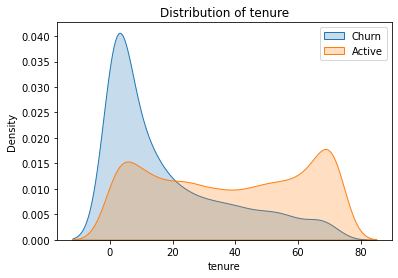

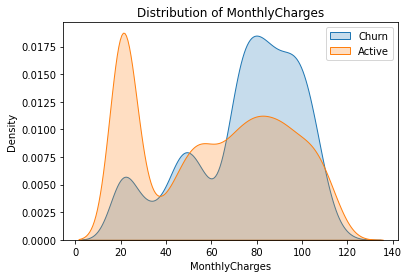

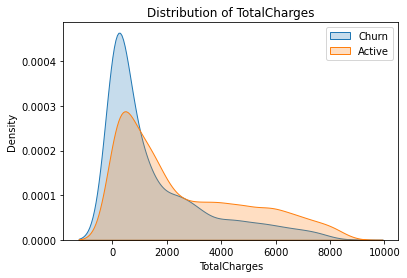

In [9]:
def KDEPlots(df1,df2,label1,label2,column):
    plt.figure()
    sns.kdeplot(data=df1,label=label1, shade=True)
    sns.kdeplot(data=df2,label=label2,shade=True)
    plt.legend()
    plt.title("Distribution of " +column)
    return

for column in numerical_columns:
    KDEPlots(data_churn[column],data_active[column],'Churn','Active',column)

Dựa vào các biểu đồ phân bố trên, chúng tôi đã đưa ra 1 số insights về Churn Customer như sau:
- Khoảng thời gian họ là khách hàng của Công ty càng ngắn thì họ càng có nguy cơ trở thành Churn Customer.
- Chi phí hàng tháng của khách hàng càng lớn thì khách hàng đó càng có nguy cơ trở thành Churn Customer.
- Tổng tất cả các chi phí khách hàng phải trả kể từ khi họ sử dụng dịch vụ của Công ty càng thấp thì họ càng có nguy cơ trở thành Churn Customer.

Chúng tôi tiếp tục tạo hàm để visualize các trường dạng categorical bằng biểu đồ CountPlots.

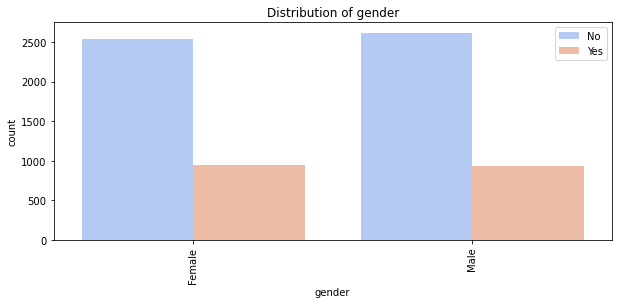

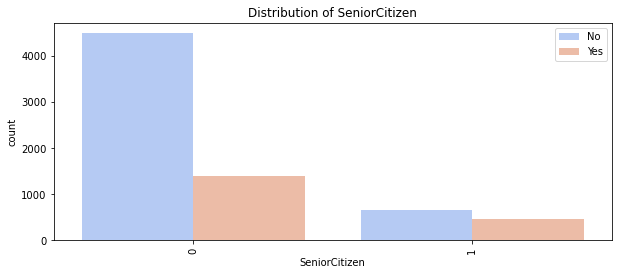

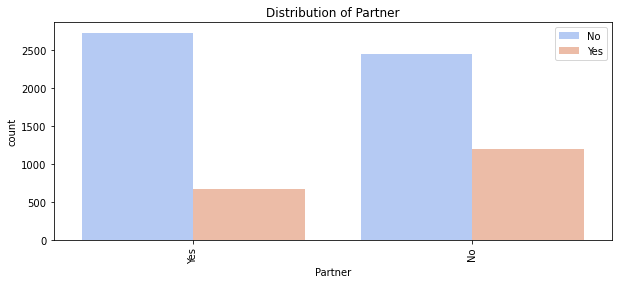

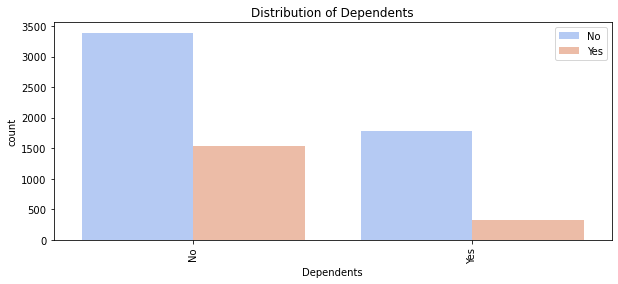

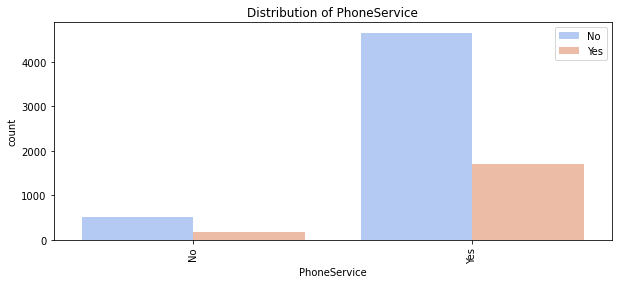

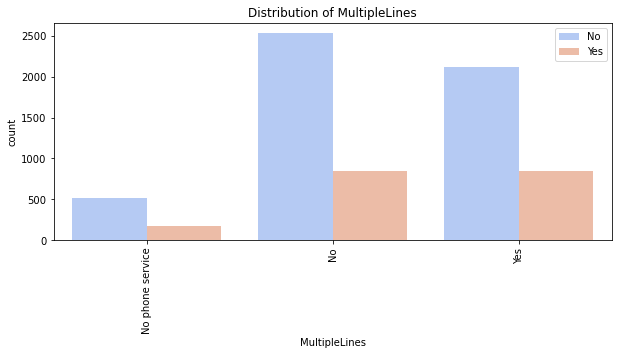

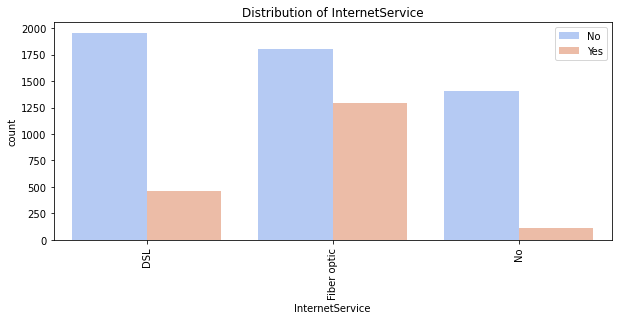

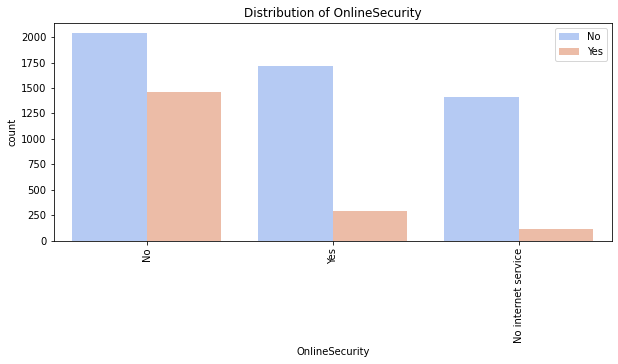

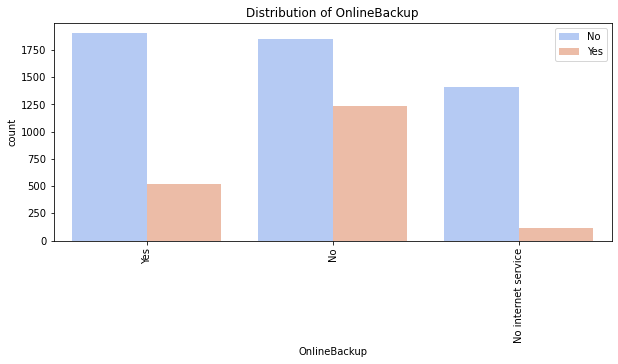

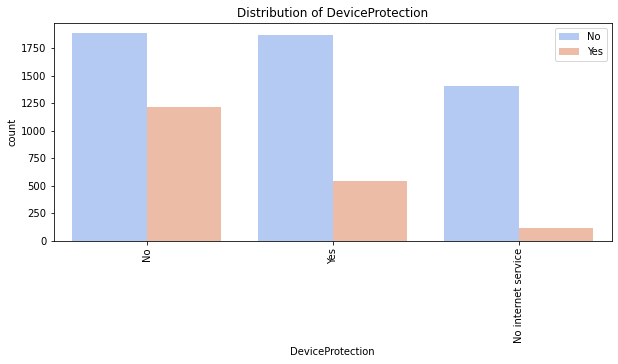

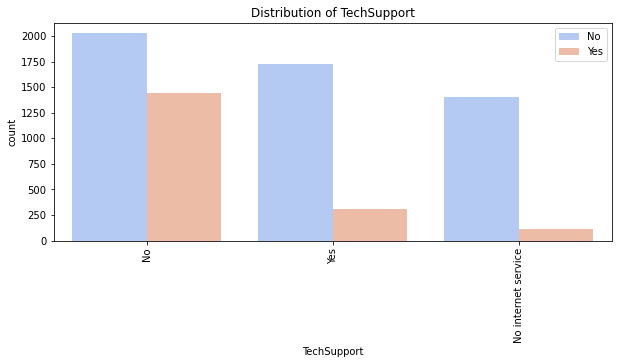

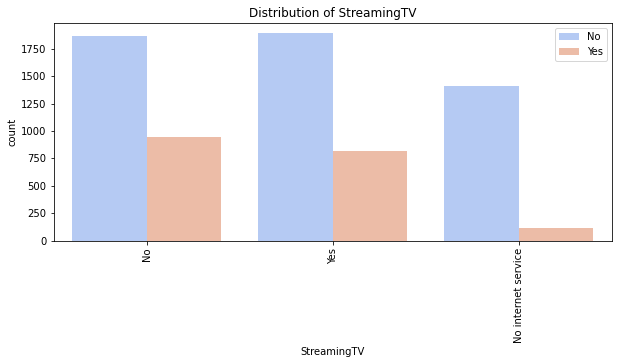

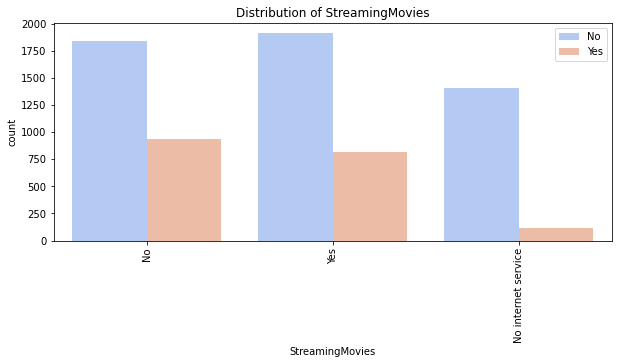

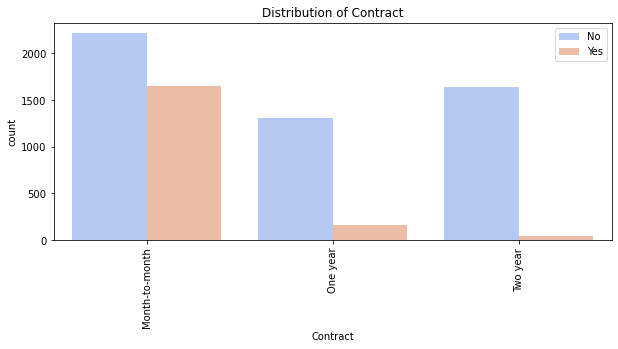

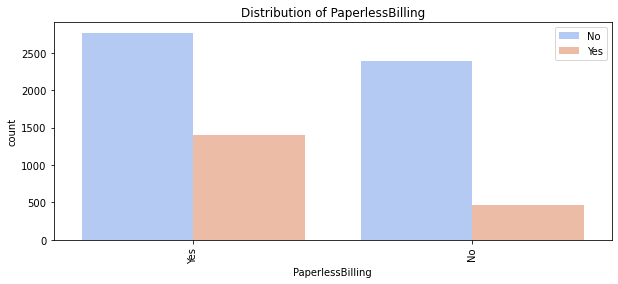

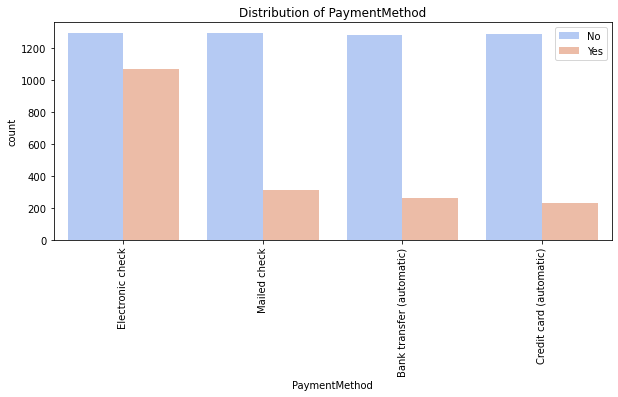

In [10]:
def DistPlot(df,hue,column):
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=90)
    sns.countplot(x=column, hue=hue,palette="coolwarm", data=df)
    plt.title("Distribution of " +column)
    plt.legend()
    return

for column in categorical_columns:
    DistPlot(data,'Churn',column)

Dựa vào các biểu đồ phân bố trên, chúng tôi đã liệt kê một số dấu hiệu của Churn Customer như sau:
- Khách hàng không thuộc nhóm người cao tuổi
- Khách hàng độc thân hoặc sống một mình
- Khách hàng sử dụng dịch vụ điện thoại (Phone Service)
- Khách hàng thường sử dụng dịch vụ internet cáp quang (Fiber Optic Internet Service)
- Khách hàng không sử dụng dịch vụ nâng cao an ninh mạng (Online Security), sao lưu dữ liệu (Online Backup), bảo vệ thiết bị điện tử (Device Protection) hoặc hỗ trợ kĩ thuật (Tech Support)
- Khách hàng thường đăng kí dịch vụ theo tháng (Month-to-month)
- Khách hàng thường lựa chọn thanh toán và nhận hóa đơn trực tuyến (Paperless billing)
- Khách hàng sử dụng phương thức thanh toán điện tử (Electronic check)

<h2> Chuẩn hóa dữ liệu (Normalization)

Chúng tôi tiến hành normalize dữ liệu để chuẩn bị cho bước xây dựng mô hình. Đối với các trường dữ liệu thuộc dạng categorical, chúng tôi normalize bằng phương pháp Dummy variable. Đối với các trường dữ liệu thuộc dạng numerical, chúng tôi normalize bằng phương pháp Min-Max.

<h3> Phương pháp sử dụng biến giả (Dummy Variable)

Chúng tôi chia các trường categorical thành 2 lists:
- List 1 - 'categorical_columns_1': Các trường trong list này chỉ chứa 2 giá trị (Yes/No)
- List 2 - 'categorical_columns_2': Các trường trong list này có trên 2 giá trị

In [11]:
categorical_columns_1 = []
categorical_columns_2 = []
for column in data.columns:
    if (data[column].dtype == 'O') & (len(data[column].unique()) == 2):
        categorical_columns_1.append(column)
    if (data[column].dtype == 'O') & (len(data[column].unique()) > 2):
        categorical_columns_2.append(column)

In [12]:
# Chuẩn hóa dữ liệu bằng phương pháp sử dụng biến giả
data = pd.get_dummies(data = data, columns = categorical_columns_1, drop_first = True, dtype = 'int64')
data = pd.get_dummies(data = data, columns = categorical_columns_2, drop_first = False, dtype = 'int64')

<h3> Phương pháp Min-Max (Min-Max Normalization)

Chúng tôi sẽ áp dụng phương pháp Min-Max để normalize 3 trường sau: 'tenure', 'MonthlyCharges', 'TotalCharges'.

In [13]:
data['tenure'] = (data['tenure'] - data['tenure'].min()) / (data['tenure'].max() - data['tenure'].min())
data['MonthlyCharges'] = (data['MonthlyCharges'] - data['MonthlyCharges'].min()) / (data['MonthlyCharges'].max() 
                                                                                    - data['MonthlyCharges'].min())
data['TotalCharges'] = (data['TotalCharges'] - data['TotalCharges'].min()) / (data['TotalCharges'].max() 
                                                                              - data['TotalCharges'].min())

In [14]:
data.describe()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.442560,0.463166,0.261309,0.504693,0.162400,0.482509,0.298493,0.903299,0.592719,0.265785,...,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.345708,0.299363,0.261571,0.500014,0.368844,0.499729,0.457629,0.295571,0.491363,0.441782,...,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112676,0.172512,0.044155,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.394366,0.518408,0.159090,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.760563,0.712562,0.435719,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> Lựa chọn đặc trưng (Predictor Selection)

In [15]:
from scipy import stats
print('Setup Complete.')

Setup Complete.


Chúng tôi đã quyết định lựa chọn các biến preditors để run mô hình bằng chỉ số correlation. Chúng tôi sẽ đánh giá mối tương quan của các trường so với trường target 'Churn_Yes' và lựa chọn các trường có tương quan cao nhất để xây dựng mô hình dự báo.

In [16]:
corr = data.corr()
corr['Churn_Yes'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
OnlineBackup_No internet service          -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

Dựa vào dữ kiện trên, chúng tôi bước đầu lựa chọn 9 biến có corr > 0.25 làm predictors. Chúng tôi đã kiểm tra lại sự quan trọng của các mối tương quan này bằng chỉ số P-value.

In [17]:
predictors = ['Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic',
             'Contract_Two year', 'PaymentMethod_Electronic check', 'OnlineBackup_No', 'DeviceProtection_No']
P_values = []
for i in predictors:
    pearson_coef, p_value = stats.pearsonr(data[i], data['Churn_Yes'])
    P_values.append(p_value)
P_values

[3.343151723210668e-275,
 9.437650217694736e-207,
 1.9034030492949553e-192,
 3.6733156300954676e-186,
 7.887445172148873e-154,
 9.155159235118148e-148,
 1.1500995110607725e-147,
 1.340929056276739e-115,
 2.3641338662217002e-102]

Chúng ta thấy P-value của các trường này đều tiệm cận đến 0. Do đó, chúng tôi kết luận mối tương quan giữa 9 trường này với trường target 'Churn_Yes' có ý nghĩa quan trọng. Đó là các trường sau:
- <h4> Contract_Month-to-month
- <h4> tenure
- <h4> OnlineSecurity_No
- <h4> TechSupport_No
- <h4> InternetService_Fiber optic
- <h4> Contract_Two year
- <h4> PaymentMethod_Electronic check
- <h4> OnlineBackup_No
- <h4> DeviceProtection_No

<h1> Xây dựng mô hình dự đoán (Predictive Model)

<h2> Chia tập dữ liệu Training - Testing (Training - Testing Split)

In [18]:
from sklearn.model_selection import train_test_split
print('Setup Complete.')

Setup Complete.


In [19]:
data_train, data_test = train_test_split(data, test_size = 0.2, stratify = data['Churn_Yes'], random_state = 999)

In [20]:
data_train['Churn_Yes'].value_counts()

0    4130
1    1495
Name: Churn_Yes, dtype: int64

In [21]:
data_test['Churn_Yes'].value_counts()

0    1033
1     374
Name: Churn_Yes, dtype: int64

<h2> Xử lí mất cân bằng dữ liệu (Handle Imbalanced data)

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
print('Setup Complete.')

Setup Complete.


<AxesSubplot:xlabel='Churn_Yes', ylabel='count'>

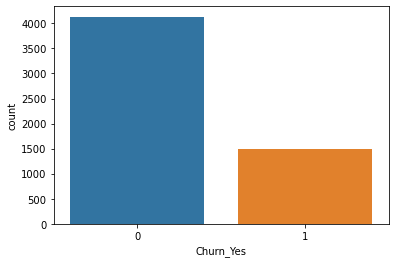

In [24]:
sns.countplot(x = 'Churn_Yes', data = data_train)

Biểu đồ trên thể hiện sự phân bố giữa Churn Customer và Active Customer. Chúng tôi nhận thấy data_train đang có sự mất cân bằng giữa 2 loại khách hàng. Do đó, chúng tôi đã tiến hành xử lý Imbalanced data bằng 2 phương pháp chính:
- OverSampling Data: Phương pháp này bao gồm 3 cách: Oversampling by ROS, Oversampling with shrinkage, Oversampling by SMOTE
- Combine OverSampling and UnderSampling

<h3> Xử lý mất cân bằng dữ liệu bằng phương pháp Oversampling Data

<h5> Oversampling by ROS

In [25]:
ros = RandomOverSampler(random_state = 999)
x = data_train.drop('Churn_Yes', axis = 1)
y = data_train['Churn_Yes']
x_resampled, y_resampled = ros.fit_resample(x, y)
y_resampled.value_counts()

0    4130
1    4130
Name: Churn_Yes, dtype: int64

In [26]:
data_train_ros = pd.concat([x_resampled, y_resampled], axis = 1)

<h5> OverSampling with shrinkage

In [27]:
ros = RandomOverSampler(random_state = 999, shrinkage = 0.1)
x = data_train.drop('Churn_Yes', axis = 1)
y = data_train['Churn_Yes']
x_resampled, y_resampled = ros.fit_resample(x, y)
y_resampled.value_counts()

0    4130
1    4130
Name: Churn_Yes, dtype: int64

In [28]:
data_train_shrinkage = pd.concat([x_resampled, y_resampled], axis = 1)

<h5> Oversampling by SMOTE

In [29]:
smote = SMOTE(random_state = 999)
x = data_train.drop('Churn_Yes', axis = 1)
y = data_train['Churn_Yes']
x_resampled, y_resampled = smote.fit_resample(x, y)
y_resampled.value_counts()

0    4130
1    4130
Name: Churn_Yes, dtype: int64

In [30]:
data_train_smote = pd.concat([x_resampled, y_resampled], axis = 1)

<h3> Xử lý mất cân bằng dữ liệu bằng cách kết hợp phương pháp Oversampling và Undersampling

In [31]:
smote_tomek = SMOTETomek(random_state = 999)
x = data_train.drop('Churn_Yes', axis = 1)
y = data_train['Churn_Yes']
x_resampled, y_resampled = smote_tomek.fit_resample(x, y)
y_resampled.value_counts()

0    3920
1    3920
Name: Churn_Yes, dtype: int64

In [32]:
data_train_smotetomek = pd.concat([x_resampled, y_resampled], axis = 1)

<h2> Chạy mô hình (Run Model)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
print('Setup Complete.')

Setup Complete.


Chúng tôi đã sử dụng 5 thuật toán để giải bài toán Classification, bao gồm:
- K-Nearest Neighbors
- Logistic Regression
- Naive Bayes
- Support Vector Machines
- Decision Tree

Chúng tôi đã xây dựng các mô hình, chạy thử trên 4 tập training trên và đánh giá mô hình trên tập data_test. Các parameters của mô hình trong báo cáo này là kết quả sau khi chúng tôi đã chạy GridSearch để tìm ra best_parameters sao cho mô hình dự báo hiệu quả nhất.

<h3> Thuật toán K-Nearest Neighbors

<h4> Chạy mô hình trên tập data_train_ros và data_test

In [34]:
# Tạo bộ dữ liệu x_train_ros, y_train_ros, x_test, y_test
x_train_ros = data_train_ros[["Contract_Month-to-month","tenure","OnlineSecurity_No","TechSupport_No",
                              "InternetService_Fiber optic","Contract_Two year","PaymentMethod_Electronic check",
                              "OnlineBackup_No","DeviceProtection_No"]]
y_train_ros = data_train_ros['Churn_Yes']
x_test = data_test[["Contract_Month-to-month","tenure","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic"
          ,"Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No","DeviceProtection_No"]]
y_test = data_test['Churn_Yes']

In [35]:
# Sử dụng thuật toán KNeighborsClassifier và huấn luyện mô hình trên tập x_train, y_train
knn = KNeighborsClassifier(n_neighbors=21, p = 1, algorithm = 'brute', metric='minkowski',weights='distance')
knn.fit(x_train_ros, y_train_ros)

# Đánh giá mô hình
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1033
           1       0.48      0.71      0.57       374

    accuracy                           0.72      1407
   macro avg       0.68      0.71      0.68      1407
weighted avg       0.77      0.72      0.73      1407

AUC: 0.7143942413716344


Chúng tôi đã tổng hợp các chỉ số F1-score, Accuracy và AUC của mô hình kNN chạy trên 4 tập training thành 3 lists tương ứng.

In [36]:
# Tạo ra 3 lists
f1_score_kNN = []
acc_kNN = []
auc_kNN = []

# Điền các giá trị F1-score, Accuracy, AUC vào lists
f1_score_kNN.append(round(f1_score(y_test, y_pred), 2))
acc_kNN.append(round(accuracy_score(y_test, y_pred), 2))
auc_kNN.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập  data_train_shrinkage và data_test

In [37]:
# Tạo bộ dữ liệu x_train_shrinkage, y_train_shrinkage
x_train_shrinkage = data_train_shrinkage[["Contract_Month-to-month","tenure","OnlineSecurity_No","TechSupport_No",
                                "InternetService_Fiber optic","Contract_Two year","PaymentMethod_Electronic check",
                                "OnlineBackup_No","DeviceProtection_No"]]
y_train_shrinkage = data_train_shrinkage['Churn_Yes']

In [38]:
# Tạo PolynomialFeatures 
poly = PolynomialFeatures(degree = 2)

# Huấn luyện mô hình trên bộ x_train và x_test
x_train_shrinkage_poly = poly.fit_transform(x_train_shrinkage)
x_test_poly = poly.fit_transform(x_test)

# Sử dụng thuật toán KNeighborsClassifier và Huấn luyện mô hình trên bộ x_train, y_train 
knn = KNeighborsClassifier(n_neighbors=29, p = 2, algorithm = 'ball_tree', metric='minkowski',weights='distance')
knn.fit(x_train_shrinkage_poly, y_train_shrinkage)

# Đánh giá mô hình
y_pred = knn.predict(x_test_poly)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.78      1033
           1       0.45      0.60      0.52       374

    accuracy                           0.70      1407
   macro avg       0.65      0.67      0.65      1407
weighted avg       0.73      0.70      0.71      1407

AUC: 0.6692619492573937


In [39]:
## Điền các giá trị F1-score, Accuracy, AUC vào lists
f1_score_kNN.append(round(f1_score(y_test, y_pred), 2))
acc_kNN.append(round(accuracy_score(y_test, y_pred), 2))
auc_kNN.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smote và data_test

In [40]:
# Tạo bộ dữ liệu  x_train_smote, y_train_smote
x_train_smote = data_train_smote[["Contract_Month-to-month","tenure","OnlineSecurity_No","TechSupport_No",
                                "InternetService_Fiber optic","Contract_Two year","PaymentMethod_Electronic check",
                                "OnlineBackup_No","DeviceProtection_No"]]
y_train_smote = data_train_smote['Churn_Yes']

In [41]:
# Tạo PolynomialFeatures 
poly = PolynomialFeatures(degree = 2)

# Huấn luyện mô hình trên bộ x_train và x_test
x_train_smote_poly = poly.fit_transform(x_train_smote)
x_test_poly = poly.fit_transform(x_test)

# Sử dụng thuật toán KNeighborsClassifier và huấn luyện mô hình trên bộ x_train, y_train 
knn = KNeighborsClassifier(n_neighbors=19, p = 1, algorithm = 'brute', metric='minkowski',weights='uniform')
knn.fit(x_train_smote_poly, y_train_smote)

# Đánh giá mô hình
y_pred = knn.predict(x_test_poly)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

AUC: 0.7522195360587253


In [42]:
# Điền các giá trị F1-score, Accuracy, AUC vào lists
f1_score_kNN.append(round(f1_score(y_test, y_pred), 2))
acc_kNN.append(round(accuracy_score(y_test, y_pred), 2))
auc_kNN.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smotetomek và data_test

In [43]:
# Tạo bộ dữ liệu x_train_smotetomek, y_train_smotetomek
x_train_smotetomek = data_train_smotetomek[["Contract_Month-to-month","tenure","OnlineSecurity_No","TechSupport_No",
                                "InternetService_Fiber optic","Contract_Two year","PaymentMethod_Electronic check",
                                "OnlineBackup_No","DeviceProtection_No"]]
y_train_smotetomek = data_train_smotetomek['Churn_Yes']

In [44]:
# Sự dụng thuật toán KNeighborsClassifier và huấn luyện mô hình trên bộ x_train, y_train 
knn = KNeighborsClassifier(n_neighbors=13, p = 1, algorithm = 'brute', metric='minkowski',weights='uniform')
knn.fit(x_train_smotetomek, y_train_smotetomek)

# Đánh giá mô hình
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

AUC: 0.7388971429458874


In [45]:
# Điền các giá trị F1-score, Accuracy, AUC vào lists
f1_score_kNN.append(round(f1_score(y_test, y_pred), 2))
acc_kNN.append(round(accuracy_score(y_test, y_pred), 2))
auc_kNN.append(round(roc_auc_score(y_test, y_pred), 2))

Chúng tôi đã tạo 1 dataframe biểu thị các chỉ số F1-score, Accuracy, AUC của mô hình kNN khi chạy trên từng tập Training data để so sánh và đưa ra mô hình hiệu quả nhất.

In [46]:
Training_data = ['ros', 'shrinkage', 'smote', 'smotetomek']
kNN_evaluation = pd.DataFrame(list(zip(Training_data, f1_score_kNN, acc_kNN, auc_kNN)), 
                              columns = ['Training data', 'F1-score', 'Accuracy', 'AUC'])
kNN_evaluation

,Training data,F1-score,Accuracy,AUC
0,ros,0.57,0.72,0.71
1,shrinkage,0.52,0.70,0.67
2,smote,0.61,0.73,0.75
3,smotetomek,0.60,0.71,0.74


Dựa vào bảng dữ liệu trên, chúng ta thấy mô hình kNN chạy trên tập data_train_smote đang hiệu quả nhất. 

In [47]:
model_evaluation = []
kNN = ['kNN', 0.61, 0.73, 0.75]
model_evaluation.append(kNN)

<h3> Thuật toán Logistic Regression

<h4> Chạy mô hình trên tập data_train_ros và data_test

In [49]:
# Tạo PolynomialFeatures 
poly = PolynomialFeatures(degree = 3)

# Huấn luyện mô hình trên bộ x_train và x_test
x_train_ros_poly = poly.fit_transform(x_train_ros)
x_test_poly = poly.fit_transform(x_test)

# Sử dụng thuật toán LogisticRegression và huấn luyện mô hình trên x_train_poly, y_train
lr = LogisticRegression(max_iter = 2000, penalty = 'l2', C = 0.1)
lr.fit(x_train_ros_poly, y_train_ros)

# Đánh giá mô hình
y_pred = lr.predict(x_test_poly)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

AUC: 0.7572668775333772


In [50]:
# Tạo 3 lists
f1_score_lr = []
acc_lr = []
auc_lr = []

# Điền các giá trị F1-score, Accuracy, AUC vào lists
f1_score_lr.append(round(f1_score(y_test, y_pred), 2))
acc_lr.append(round(accuracy_score(y_test, y_pred), 2))
auc_lr.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_shrinkage và data_test

In [52]:
# Tạo PolynomialFeatures object
poly = PolynomialFeatures(degree = 3)

# Huấn luyện mô hình trên bộ x_train và x_test
x_train_shrinkage_poly = poly.fit_transform(x_train_shrinkage)
x_test_poly = poly.fit_transform(x_test)

# Sử dụng thuật toán LogisticRegression và huấn luyện mô hình trên x_train_poly, y_train
lr = LogisticRegression(max_iter = 2000, penalty = 'l2', C = 10)
lr.fit(x_train_shrinkage_poly, y_train_shrinkage)

# Đánh giá mô hình
y_pred = lr.predict(x_test_poly)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1033
           1       0.47      0.70      0.56       374

    accuracy                           0.71      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.76      0.71      0.73      1407

AUC: 0.708447437762397


In [53]:
# Điền các giá trị F1-score, Accuracy, AUC vào lists
f1_score_lr.append(round(f1_score(y_test, y_pred), 2))
acc_lr.append(round(accuracy_score(y_test, y_pred), 2))
auc_lr.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smote và data_test

In [54]:
# Tạo PolynomialFeatures object
poly = PolynomialFeatures(degree = 3)

# Huấn luyện mô hình trên bộ x_train và x_test
x_train_smote_poly = poly.fit_transform(x_train_smote)
x_test_poly = poly.fit_transform(x_test)

# Sử dụng thuật toán LogisticRegression và huấn luyện mô hình trên x_train_poly, y_train
lr = LogisticRegression(max_iter = 2000, penalty = 'l2', C = 0.1)
lr.fit(x_train_smote_poly, y_train_smote)

# Đánh giá mô hình
y_pred = lr.predict(x_test_poly)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.78      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

AUC: 0.7610239114566887


In [55]:
# Điền các giá trị F1-score, Accuracy, AUC vào lists
f1_score_lr.append(round(f1_score(y_test, y_pred), 2))
acc_lr.append(round(accuracy_score(y_test, y_pred), 2))
auc_lr.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smotetomek và data_test

In [56]:
# Tạo PolynomialFeatures object
poly = PolynomialFeatures(degree = 3)

# Huấn luyện mô hình trên bộ x_train và x_test
x_train_smotetomek_poly = poly.fit_transform(x_train_smotetomek)
x_test_poly = poly.fit_transform(x_test)

# Sử dụng thuật toán LogisticRegression và huấn luyện mô hình trên x_train_poly, y_train
lr = LogisticRegression(max_iter = 2000, penalty = 'l2', C = 1)
lr.fit(x_train_smotetomek_poly, y_train_smotetomek)

# Đánh giá mô hình
y_pred = lr.predict(x_test_poly)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.79      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

AUC: 0.7609087285358569


In [57]:
# Điền các giá trị F1-score, Accuracy, AUC vào lists
f1_score_lr.append(round(f1_score(y_test, y_pred), 2))
acc_lr.append(round(accuracy_score(y_test, y_pred), 2))
auc_lr.append(round(roc_auc_score(y_test, y_pred), 2))

In [58]:
lr_evaluation = pd.DataFrame(list(zip(Training_data, f1_score_lr, acc_lr, auc_lr)), 
                              columns = ['Training data', 'F1-score', 'Accuracy', 'AUC'])
lr_evaluation

,Training data,F1-score,Accuracy,AUC
0,ros,0.62,0.75,0.76
1,shrinkage,0.56,0.71,0.71
2,smote,0.63,0.75,0.76
3,smotetomek,0.62,0.75,0.76


Dựa vào bảng dữ liệu trên, chúng ta thấy mô hình LR chạy trên tập data_train_smote đang hiệu quả nhất. 

In [59]:
lr = ['LR', 0.63, 0.75, 0.76]
model_evaluation.append(lr)

<h3> Thuật toán Naive Bayes

<h4> Chạy mô hình trên tập data_train_ros và data_test

In [60]:
# Sử dụng thuật toán GaussianNB và fit tập x_train, y_train vào mô hình
nb = GaussianNB()
nb.fit(x_train_ros, y_train_ros)

# Đánh giá mô hình
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76      1033
           1       0.47      0.86      0.61       374

    accuracy                           0.71      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.81      0.71      0.72      1407

AUC: 0.7544105999347729


In [61]:
# Tạo 3 lists
f1_score_nb = []
acc_nb = []
auc_nb = []

# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_nb.append(round(f1_score(y_test, y_pred), 2))
acc_nb.append(round(accuracy_score(y_test, y_pred), 2))
auc_nb.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_shrinkage và data_test

In [63]:
# Sử dụng thuật toán GaussianNB và fit tập x_train, y_train vào mô hình
nb = GaussianNB()
nb.fit(x_train_shrinkage, y_train_shrinkage)

# Đánh giá mô hình
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.43      0.59      1033
           1       0.38      0.96      0.54       374

    accuracy                           0.57      1407
   macro avg       0.67      0.69      0.57      1407
weighted avg       0.81      0.57      0.58      1407

AUC: 0.6920655792018471


In [64]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_nb.append(round(f1_score(y_test, y_pred), 2))
acc_nb.append(round(accuracy_score(y_test, y_pred), 2))
auc_nb.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smote và data_test

In [65]:
# Sử dụng thuật toán GaussianNB và fit tập x_train, y_train vào mô hình
nb = GaussianNB()
nb.fit(x_train_smote, y_train_smote)

# Đánh giá mô hình
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1033
           1       0.47      0.86      0.61       374

    accuracy                           0.70      1407
   macro avg       0.70      0.75      0.68      1407
weighted avg       0.80      0.70      0.72      1407

AUC: 0.7523593085918694


In [66]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_nb.append(round(f1_score(y_test, y_pred), 2))
acc_nb.append(round(accuracy_score(y_test, y_pred), 2))
auc_nb.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smotetomek và data_test

In [67]:
# Sử dụng thuật toán GaussianNB và fit tập x_train, y_train vào mô hình
nb = GaussianNB()
nb.fit(x_train_smotetomek, y_train_smotetomek)

# Đánh giá mô hình 
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1033
           1       0.46      0.86      0.60       374

    accuracy                           0.70      1407
   macro avg       0.70      0.75      0.68      1407
weighted avg       0.80      0.70      0.72      1407

AUC: 0.7499391730642799


In [68]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_nb.append(round(f1_score(y_test, y_pred), 2))
acc_nb.append(round(accuracy_score(y_test, y_pred), 2))
auc_nb.append(round(roc_auc_score(y_test, y_pred), 2))

In [69]:
nb_evaluation = pd.DataFrame(list(zip(Training_data, f1_score_nb, acc_nb, auc_nb)), 
                              columns = ['Training data', 'F1-score', 'Accuracy', 'AUC'])
nb_evaluation

,Training data,F1-score,Accuracy,AUC
0,ros,0.61,0.71,0.75
1,shrinkage,0.54,0.57,0.69
2,smote,0.61,0.70,0.75
3,smotetomek,0.60,0.70,0.75


Dựa vào bảng dữ liệu trên, chúng ta thấy mô hình NB chạy trên tập data_train_ros đang hiệu quả nhất. 

In [70]:
nb = ['NB', 0.61, 0.71, 0.75]
model_evaluation.append(nb)

<h3> Thuật toán Support Vector Machines

<h4> Chạy mô hình trên tập data_train_ros và data_test

In [71]:
# Sử dụng thuật toán SVC và fit tập x_train, y_train vào mô hình
svm = SVC(C=1000, gamma=1)
svm.fit(x_train_ros, y_train_ros)

# Đánh giá mô hình
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.48      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407

AUC: 0.7328118609936274


In [72]:
# Tạo 3 lists
f1_score_svm = []
acc_svm = []
auc_svm = []

# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_svm.append(round(f1_score(y_test, y_pred), 2))
acc_svm.append(round(accuracy_score(y_test, y_pred), 2))
auc_svm.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_shrinkage và data_test

In [74]:
# Sử dụng thuật toán SVC và fit tập x_train, y_train vào mô hình
f1_score_svm.append(round(f1_score(y_test, y_pred), 2))
acc_svm.append(round(accuracy_score(y_test, y_pred), 2))
auc_svm.append(round(roc_auc_score(y_test, y_pred), 2))# Create a SVC object and fit x_train, y_train to model
svm = SVC(C=1, gamma=1)
svm.fit(x_train_shrinkage, y_train_shrinkage)

# Đánh giá mô hình
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1033
           1       0.45      0.70      0.55       374

    accuracy                           0.69      1407
   macro avg       0.66      0.69      0.66      1407
weighted avg       0.75      0.69      0.71      1407

AUC: 0.6938114416760279


In [75]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_svm.append(round(f1_score(y_test, y_pred), 2))
acc_svm.append(round(accuracy_score(y_test, y_pred), 2))
auc_svm.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smote và data_test

In [76]:
# Sử dụng thuật toán SVC và fit tập x_train, y_train vào mô hình
svm = SVC(C=1000, gamma=1)
svm.fit(x_train_smote, y_train_smote)

# Đánh giá mô hình
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

AUC: 0.7409717297109814


In [77]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_svm.append(round(f1_score(y_test, y_pred), 2))
acc_svm.append(round(accuracy_score(y_test, y_pred), 2))
auc_svm.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smotetomek và data_test

In [78]:
# Sử dụng thuật toán SVC và fit tập x_train, y_train vào mô hình
svm = SVC(C=1000, gamma=1)
svm.fit(x_train_smotetomek, y_train_smotetomek)

# Đánh giá mô hình
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.79      0.72      0.74      1407

AUC: 0.7459271836869924


In [79]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_svm.append(round(f1_score(y_test, y_pred), 2))
acc_svm.append(round(accuracy_score(y_test, y_pred), 2))
auc_svm.append(round(roc_auc_score(y_test, y_pred), 2))

In [80]:
svm_evaluation = pd.DataFrame(list(zip(Training_data, f1_score_svm, acc_svm, auc_svm)), 
                              columns = ['Training data', 'F1-score', 'Accuracy', 'AUC'])
svm_evaluation

,Training data,F1-score,Accuracy,AUC
0,ros,0.59,0.71,0.73
1,shrinkage,0.59,0.71,0.73
2,smote,0.55,0.69,0.69
3,smotetomek,0.60,0.71,0.74


Dựa vào bảng dữ liệu trên, chúng ta thấy mô hình SVM chạy trên tập data_train_smotetomek đang hiệu quả nhất. 

In [81]:
svm = ['SVM', 0.6, 0.71, 0.74]
model_evaluation.append(svm)

<h3> Thuật toán Decision Trees

<h4> Chạy mô hình trên tập data_train_ros và data_test

In [82]:
# Sử dụng thuật toán DecisionTreeClassifier object và fit tập x_train, y_train vào mô hình
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=999)
clf_gini.fit(x_train_ros, y_train_ros)

# Đánh giá mô hình
y_pred = clf_gini.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407

AUC: 0.7508360468186217


In [83]:
# Tạo 3 lists
f1_score_dt = []
acc_dt = []
auc_dt = []

# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_dt.append(round(f1_score(y_test, y_pred), 2))
acc_dt.append(round(accuracy_score(y_test, y_pred), 2))
auc_dt.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_shrinkage và data_test

In [84]:
# Sử dụng thuật toán DecisionTreeClassifier object và fit tập x_train, y_train vào mô hình
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=999)
clf_gini.fit(x_train_shrinkage, y_train_shrinkage)

# Đánh giá mô hình
y_pred = clf_gini.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1033
           1       0.48      0.61      0.53       374

    accuracy                           0.72      1407
   macro avg       0.66      0.68      0.67      1407
weighted avg       0.75      0.72      0.73      1407

AUC: 0.6833220307396037


In [85]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_dt.append(round(f1_score(y_test, y_pred), 2))
acc_dt.append(round(accuracy_score(y_test, y_pred), 2))
auc_dt.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smote và data_test

In [86]:
# Sử dụng thuật toán DecisionTreeClassifier object và fit tập x_train, y_train vào mô hình
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=999)
clf_gini.fit(x_train_smote, y_train_smote)

# Đánh giá mô hình
y_pred = clf_gini.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407

AUC: 0.7508360468186217


In [87]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_dt.append(round(f1_score(y_test, y_pred), 2))
acc_dt.append(round(accuracy_score(y_test, y_pred), 2))
auc_dt.append(round(roc_auc_score(y_test, y_pred), 2))

<h4> Chạy mô hình trên tập data_train_smotetomek và data_test

In [88]:
# Sử dụng thuật toán DecisionTreeClassifier object và fit tập x_train, y_train vào mô hình
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=999)
clf_gini.fit(x_train_smotetomek, y_train_smotetomek)

# Đánh giá mô hình
y_pred = clf_gini.predict(x_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407

AUC: 0.7508360468186217


In [89]:
# Điền giá trị F1-score, Accuracy, AUC vào lists
f1_score_dt.append(round(f1_score(y_test, y_pred), 2))
acc_dt.append(round(accuracy_score(y_test, y_pred), 2))
auc_dt.append(round(roc_auc_score(y_test, y_pred), 2))

In [90]:
dt_evaluation = pd.DataFrame(list(zip(Training_data, f1_score_dt, acc_dt, auc_dt)), 
                              columns = ['Training data', 'F1-score', 'Accuracy', 'AUC'])
dt_evaluation

,Training data,F1-score,Accuracy,AUC
0,ros,0.61,0.74,0.75
1,shrinkage,0.53,0.72,0.68
2,smote,0.61,0.74,0.75
3,smotetomek,0.61,0.74,0.75


Dựa vào bảng dữ liệu trên, chúng ta thấy mô hình DT chạy trên tập data_train_smotetomek, data_train_smote, data_train_ros đều đang có các chỉ số tốt nhất. 

In [91]:
dt = ['DT', 0.61, 0.74, 0.75]
model_evaluation.append(dt)
model_evaluation = pd.DataFrame(model_evaluation, columns = ['Model', 'F1-score', 'Accuracy', 'AUC'])

In [92]:
model_evaluation

,Model,F1-score,Accuracy,AUC
0,kNN,0.61,0.73,0.75
1,LR,0.63,0.75,0.76
2,NB,0.61,0.71,0.75
3,SVM,0.60,0.71,0.74
4,DT,0.61,0.74,0.75


Sau khi so sánh 5 model đã xây dựng, chúng tôi thấy Logistic Regression là mô hình hiệu quả nhất. Do đó, chúng tôi đã lựa chọn Logistic Regression để làm mô hình dự báo Churn Customer.